# ATENÇÃO

Neste trabalho serão analisados os dados de 891 dos 2224 passageiros do Titanic e extraídas informações relevantes à respeito das mesmas. As conclusões obtidas não são definitivas, podendo ser refinadas e melhor trabalhadas para obtenção de mais informações a respeito das mesmas, bem como análises complementares são recomendadas.

Os dados analisados foram encontrados [neste link](https://www.kaggle.com/c/titanic/data).

In [98]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# Importação do arquivo de dados
df = pd.read_csv('titanic-data-6.csv', index_col=0)

In [100]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

In [101]:
# Primeiras linhas do arquivo importado
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
# Informações sobre o DataFrame
df.shape

(891, 11)

In [103]:
# Descrição dos dados
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
# Tipos dos dados
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [105]:
# Remoção de linhas duplicadas
df.drop_duplicates(inplace=True)
df.shape

(891, 11)

In [106]:
# Remoção das colunas desnecessárias
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [107]:
# Renomeação de colunas
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.rename(columns={'pclass': 'class', 'sibsp': 'siblings_spouses', 'parch': 'parents_children'}, inplace=True)

In [108]:
# Exibição das colunas renomeadas
df.head()

,survived,class,sex,age,siblings_spouses,parents_children,fare,embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Perguntas

1. Quais classes sociais com maiores índices de sobrevivência?
2. Qual sexo com maiores índices de sobrevivência?
3. Qual a faixa etária com maiores índices de sobrevivência?
4. Existe relação entre idade e taxa de embarque?

In [109]:
# Contagem de linhas com classe social nula
df['class'].isnull().sum()

0

In [110]:
# Contagem de linhas com sexo nulo
df['sex'].isnull().sum()

0

In [111]:
# Contagem de linhas com idade nula
df['age'].isnull().sum()

177

In [112]:
# Contadores de sobrevivência
df_survived = df.query('survived == 1')
df_died = df.query('survived == 0')

In [113]:
# Resultados encontrados para os sobreviventes
df_survived.shape

(342, 8)

In [114]:
# Resultados encontrados para as vítimas
df_died.shape

(549, 8)

In [115]:
# Verificando que nenhum passageiro está sem a flag de sobrevivência definida
(df_survived.shape[0] + df_died.shape[0]) == df.shape[0]

True

In [116]:
# Contadores de sobrevivência com idade não nula
# np.isfinite hint: https://stackoverflow.com/questions/2831516/isnotnan-functionality-in-numpy-can-this-be-more-pythonic
df_survived_with_age = df_survived[df_survived['age'].apply(np.isfinite)]
df_died_with_age = df_died[df_died['age'].apply(np.isfinite)]

In [117]:
# Resultados encontrados para os sobreviventes com idade preenchida
df_survived_with_age.shape

(290, 8)

In [118]:
# Resultados encontrados para as vítimas com idade preenchida
df_died_with_age.shape

(424, 8)

In [119]:
"""
Retorna a contagem de ocorrências de um determinado campo no dataframe

Argumentos:
    df_input: array multidimensional de entrada
    field: campo a ser contado
Retorna:
    list: cada posição representando um valor único para o campo informado
"""
def fields_counter(df_input, field):
    groups = {}
    df_grouped = df_input.groupby(field)[field].count()
    
    for group in df_input[field].unique():
        groups[group] = df_grouped[group]
            
    return groups

In [120]:
"""
Retorna a porcentagem de ocorrências de um determinado campo no dataframe

Argumentos:
    df_counter: array multidimensional de entrada com as contagens já realizadas
    df_total: array multidimensional representando o universo total de elementos
Retorna:
    list: cada posição representando um valor único para o campo informado
"""
def fields_percent(df_counter, df_total):
    groups = {}
    
    for group in df_counter:
        groups[group] = df_counter[group] * 100 / df_total.shape[0]
            
    return groups

In [121]:
"""
Retorna um gráfico de barras para um dicionário informado

Argumentos:
    df_input: array multidimensional de entrada
Retorna:
    list: gráfico de barras com os elementos do array de entrada ordenados pela chave
"""
def graph_bar_generator(df_input):
    df_sorted = {}
    
    # Sort method: https://www.saltycrane.com/blog/2007/09/how-to-sort-python-dictionary-by-keys/
    for key in sorted(df_input.keys()):
        df_sorted[key] = df_input[key]
    
    plt.bar(range(len(df_sorted)), df_sorted.values(), align='center')
    plt.xticks(range(len(df_sorted)), list(df_sorted.keys()))
    
    return plt.show()

In [122]:
"""
Separa os dados por faixa etária

Argumentos:
    df_input: array multidimensional de entrada
    age_range: faixa etária desejada
Retorna:
    list: data frame filtrado com a faixa etária desejada
"""
def chop_by_age_range(df_input, age_range):
    # Faixas etárias: https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Faixas_et%C3%A1rias_do_Brasil
    def range_1():
        return "age >= 0 and age < 15"
    def range_2():
        return "age >= 15 and age < 30"
    def range_3():
        return "age >= 30 and age < 60"
    def range_4():
        return "age >= 60"
    
    # Switch/Case: https://stackoverflow.com/questions/11479816/what-is-the-python-equivalent-for-a-case-switch-statement
    options = {
        1: range_1,
        2: range_2,
        3: range_3,
        4: range_4
    }
    
    query = options[age_range]()
    return df_input.query(query)

## Pergunta 1

In [123]:
# Contador de sobreviventes e vítimas de cada classe social
df_survived_classes_counter = fields_counter(df_survived, 'class')
df_died_classes_counter = fields_counter(df_died, 'class')

print(df_survived_classes_counter)
print(df_died_classes_counter)

{1: 136, 3: 119, 2: 87}
{3: 372, 1: 80, 2: 97}


In [124]:
# Percentual de sobreviventes e vítimas de cada classe social
df_survived_classes_percent = fields_percent(df_survived_classes_counter, df_survived)
df_died_classes_percent = fields_percent(df_died_classes_counter, df_died)

print(df_survived_classes_percent)
print(df_died_classes_percent)

{1: 39.76608187134503, 3: 34.7953216374269, 2: 25.43859649122807}
{3: 67.75956284153006, 1: 14.571948998178506, 2: 17.66848816029144}


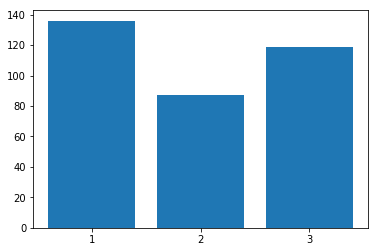

In [125]:
# Gráfico de sobreviventes por classe em barra
graph_bar_generator(df_survived_classes_counter)

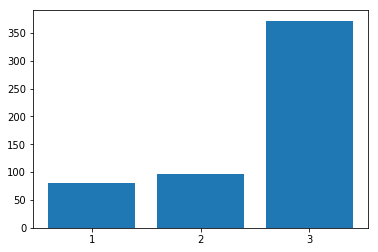

In [126]:
# Gráfico de vítimas por classe em barra
graph_bar_generator(df_died_classes_counter)

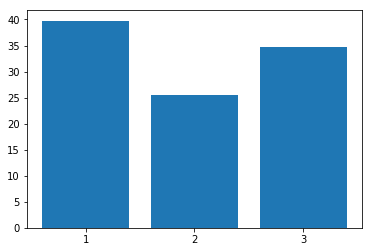

In [127]:
# Gráfico de porcentagem de sobreviventes por classe em barra
graph_bar_generator(df_survived_classes_percent)

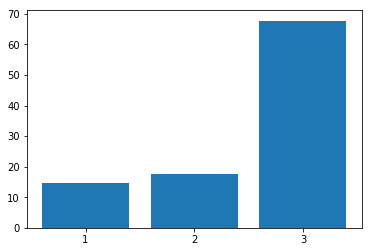

In [128]:
# Gráfico de porcentagem de vítimas por classe em barra
graph_bar_generator(df_died_classes_percent)

### Resposta

A classe social com maiores índices de sobrevivência foram: 1a., 3a. e 2a., em ordem. A 1a. classe representa 39,77% do total de sobreviventes.

A classe social com maiores índices de vítimas foram: 3a., 2a. e 1a., em ordem. A 3a. classe respresenta 67,76% das vítimas fatais do acidente.

As faixas etárias são:
* Faixa 1: >= 0 e < 15
* Faixa 2: >= 15 e age < 30
* Faixa 3: >= 30 e age < 60
* Faixa 4: >= 60

## Pergunta 2

In [129]:
# Contador de sobreviventes e vítimas de cada sexo
df_survived_genders_counter = fields_counter(df_survived, 'sex')
df_died_genders_counter = fields_counter(df_died, 'sex')

print(df_survived_genders_counter)
print(df_died_genders_counter)

{'female': 233, 'male': 109}
{'male': 468, 'female': 81}


In [130]:
# Percentual de sobreviventes e vítimas de cada sexo
df_survived_genders_percent = fields_percent(df_survived_genders_counter, df_survived)
df_died_genders_percent = fields_percent(df_died_genders_counter, df_died)

print(df_survived_genders_percent)
print(df_died_genders_percent)

{'female': 68.12865497076024, 'male': 31.871345029239766}
{'male': 85.24590163934427, 'female': 14.754098360655737}


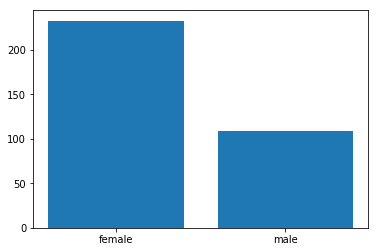

In [131]:
# Gráfico de sobreviventes por sexo em barra
graph_bar_generator(df_survived_genders_counter)

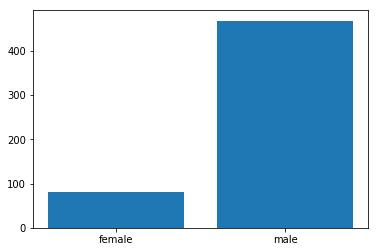

In [132]:
# Gráfico de vítimas por sexo em barra
graph_bar_generator(df_died_genders_counter)

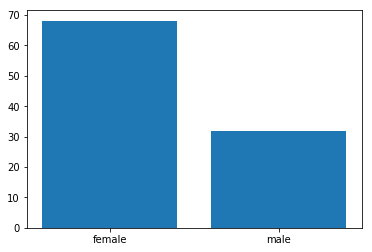

In [133]:
# Gráfico de porcentagem de sobreviventes por sexo em barra
graph_bar_generator(df_survived_genders_percent)

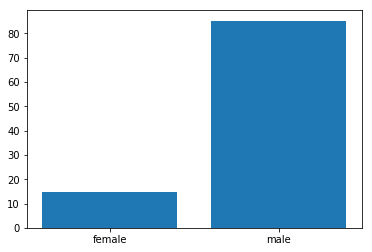

In [134]:
# Gráfico de porcentagem de vítimas por sexo em barra
graph_bar_generator(df_died_genders_percent)

### Resposta

O sexo com maiores índices de sobrevivência foi o feminino, representando 68,13% do total de sobreviventes.

O sexo com maiores índices de vítimas foi o masculino, representando 85,25% das vítimas fatais do acidente.

## Pergunta 3

In [135]:
# Separa as faixas de idade
df_survived_range = {}
df_died_range = {}

for i in range(4):
    df_survived_range[i+1] = chop_by_age_range(df_survived_with_age, (i+1))
    df_died_range[i+1] = chop_by_age_range(df_died_with_age, (i+1))    

In [136]:
# Prepara os dados para exibição
survived_list_age_range = {}
died_list_age_range = {}

for i in range(4):
    survived_list_age_range[i+1] = df_survived_range[i+1]['age'].count()
    died_list_age_range[i+1] = df_died_range[i+1]['age'].count()

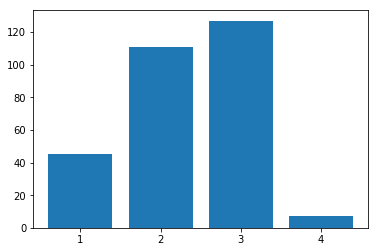

In [137]:
# Gráfico de sobreviventes por faixa etária em barra
graph_bar_generator(survived_list_age_range)

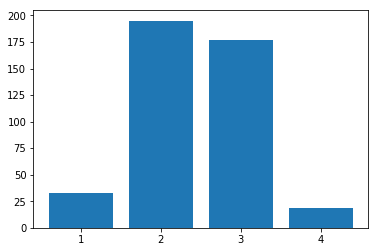

In [138]:
# Gráfico de vítimas por faixa etária em barra
graph_bar_generator(died_list_age_range)

In [139]:
# Percentual de sobreviventes e vítimas de cada faixa etária
df_survived_age_range_percent = fields_percent(survived_list_age_range, df_survived_with_age)
df_died_age_range_percent = fields_percent(died_list_age_range, df_died_with_age)

print(df_survived_age_range_percent)
print(df_died_age_range_percent)

{1: 15.517241379310345, 2: 38.275862068965516, 3: 43.793103448275865, 4: 2.413793103448276}
{1: 7.783018867924528, 2: 45.990566037735846, 3: 41.74528301886792, 4: 4.481132075471698}


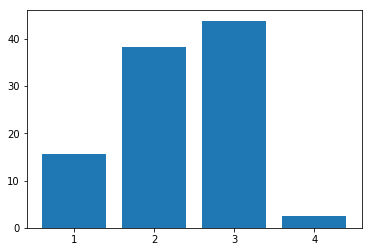

In [140]:
# Gráfico de porcentagem de sobreviventes por faixa etária em barra
graph_bar_generator(df_survived_age_range_percent)

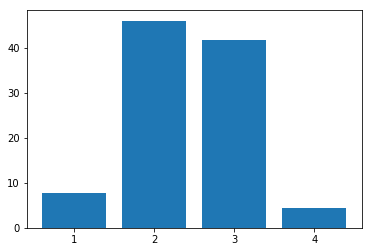

In [141]:
# Gráfico de porcentagem de sobreviventes por faixa etária em barra
graph_bar_generator(df_died_age_range_percent)

### Resposta

A faixa etária com maiores índices de sobrevivência foram: 3, 2, 1 e 4, em ordem. A faixa etária 3 representa 43,79% do total de sobreviventes que tiveram suas idade catalogadas.

A faixa etária com maiores índices de vítimas foram: 2, 3, 1 e 4, em ordem. A faixa etária 2 respresenta 45,99% das vítimas fatais do acidente que tiveram suas idade catalogadas.

## Pergunta 4

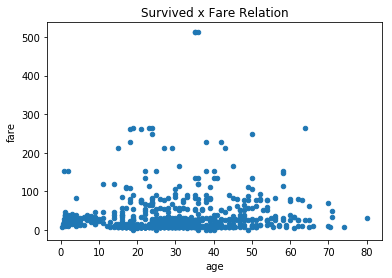

In [142]:
# Gráfico de dispersão fazendo relação entre idade e taxa de embarque
df.plot(kind='scatter', x='age', y='fare', title='Survived x Fare Relation');

### Resposta

Não existem evidências estatísticas que apontem correlação entre as variáveis idade (age) e taxa de embarque (fare).